## HomeWork 4
- NGUYEN NGOC THIEN PHUC
- N21DCCN066
- D21CQCNPM01-N

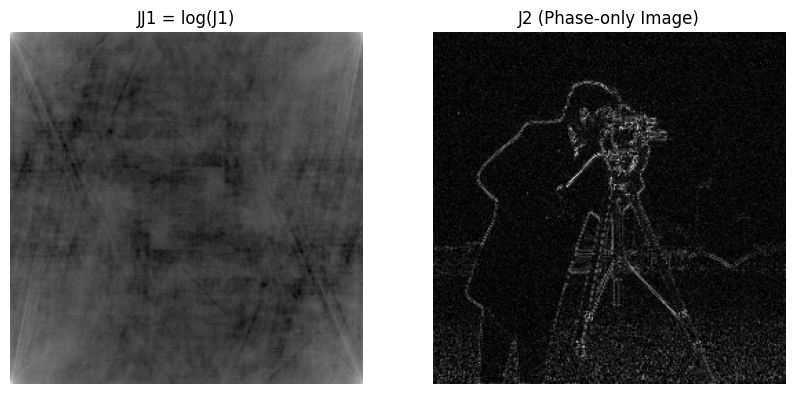

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Step 1: Load the image
# Assuming 'camera.bin' is a binary file containing the Cameraman image
image_size = (256, 256)  # Assuming the image is 256x256
I6 = np.fromfile('D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork4/camerabin.sec', dtype=np.uint8).reshape(image_size)

# Step 2: Compute the DFT of I6
F = fft2(I6)  # DFT of the image
F_mag = np.abs(F)  # Magnitude of the DFT
F_phase = np.angle(F)  # Phase of the DFT

# Step 3: Construct J1 and J2
# J1: Magnitude with phase = 0
F_J1 = F_mag * np.exp(1j * 0)  # Phase set to zero
J1 = np.abs(ifft2(F_J1))  # Inverse DFT to get J1 (real-valued)

# J2: Phase with magnitude = 1
F_J2 = np.exp(1j * F_phase)  # Magnitude set to 1
J2 = np.abs(ifft2(F_J2))  # Inverse DFT to get J2 (real-valued)

# Step 4: Process and display JJ1
# JJ1 = log(J1) for better visualization
epsilon = 1e-8  # To avoid log(0)
JJ1 = np.log(J1 + epsilon)

# Normalize JJ1 and J2 to 8-bit range (0-255)
JJ1_normalized = 255 * (JJ1 - np.min(JJ1)) / (np.max(JJ1) - np.min(JJ1))
J2_normalized = 255 * (J2 - np.min(J2)) / (np.max(J2) - np.min(J2))

# Convert to uint8 for display
JJ1_display = JJ1_normalized.astype(np.uint8)
J2_display = J2_normalized.astype(np.uint8)

# Step 5: Display the results
plt.figure(figsize=(10, 5))

# Display JJ1 (log-magnitude image)
plt.subplot(1, 2, 1)
plt.imshow(JJ1_display, cmap='gray')
plt.title('JJ1 = log(J1)')
plt.axis('off')

# Display J2 (phase-only image)
plt.subplot(1, 2, 2)
plt.imshow(J2_display, cmap='gray')
plt.title('J2 (Phase-only Image)')
plt.axis('off')

plt.show()
